In [ ]:
!pip install elang

     |████████████████████████████████| 342 kB 2.7 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow import keras 

In [ ]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model, Model
from keras.layers import Activation, Dense, Dropout, Embedding, LSTM
from keras import utils
from tensorflow.keras.optimizers import RMSprop

# Word2vec
import gensim
from gensim.models import Word2Vec

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import html
import string as str
from elang.plot.utils import plot2d, plotNeighbours

# Widget
from ipywidgets import widgets

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kominfo/data vaksin/data olah/dfazclean.csv',sep=';')

In [ ]:
df.head()

,pesan,label
0,yolls deh vaccine ke bead vaccine nih viral ko...,1
1,thank you dbctssi and aventus aventus filo,1
2,staf kami sentiasa mementingkan aspek kebersih...,1
3,lengkap sudah dua dosis vaksin astra zeneca di...,1
4,lengkap sudah dua dosis vaksin astra zeneca di...,1


In [ ]:
decode_map = ({0: "NEGATIF", 1: "POSITIF",2: "NETRAL"})

def decode_sentiment(label): 
  return decode_map[int(label)]

In [ ]:
%%time
df.label = df.label.apply(lambda x: decode_sentiment(x)) 

CPU times: user 1.55 ms, sys: 0 ns, total: 1.55 ms
Wall time: 1.57 ms


Text(0.5, 1.0, 'Dataset Labels Distribution')

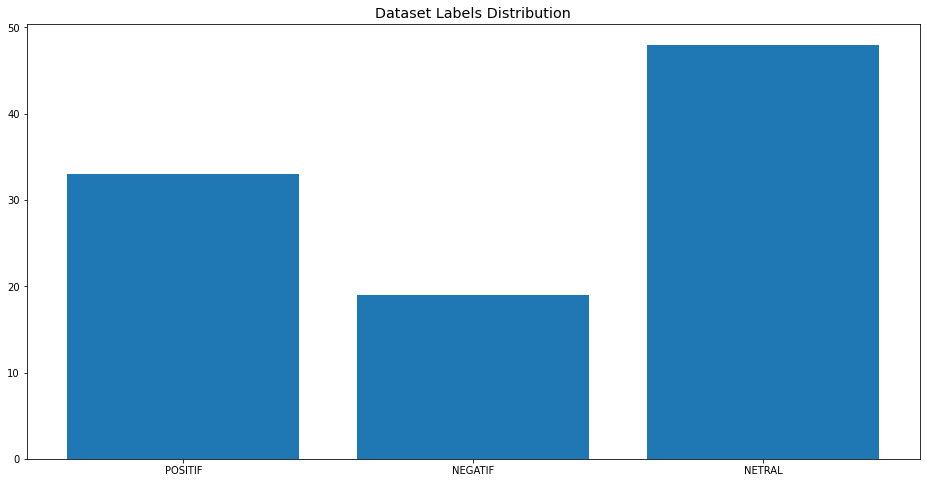

In [ ]:
Label_cnt = Counter(df.label)

plt.figure(figsize=(16,8)) 
plt.bar(Label_cnt.keys(), Label_cnt.values()) 
plt.title("Dataset Labels Distribution", fontsize="x-large")

**Spliting Data**

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

train_percentage = df_train['label'].value_counts(normalize=True)*100

test_percentage  = df_test['label'].value_counts(normalize=True)*100

print('TRAIN DATASET')
print('Train size:', len(df_train))
print('Persentase Train Dataset:')
print(round(train_percentage, 2))

print('=================================================================')

print('TEST DATASET')
print('Test size:', len(df_test))
print('Persentase Test Dataset:')
print(round(test_percentage, 2))

TRAIN DATASET
Train size: 80
Persentase Train Dataset:
NETRAL     47.50
POSITIF    33.75
NEGATIF    18.75
Name: label, dtype: float64
TEST DATASET
Test size: 20
Persentase Test Dataset:
NETRAL     50.0
POSITIF    30.0
NEGATIF    20.0
Name: label, dtype: float64
